In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [2]:
df=pd.read_csv("Avm_Musterileri.csv")
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


In [3]:
df.rename(columns={"Annual Income (k$)":"income"},inplace=True)
df.rename(columns={"Spending Score (1-100)":"score"},inplace=True)

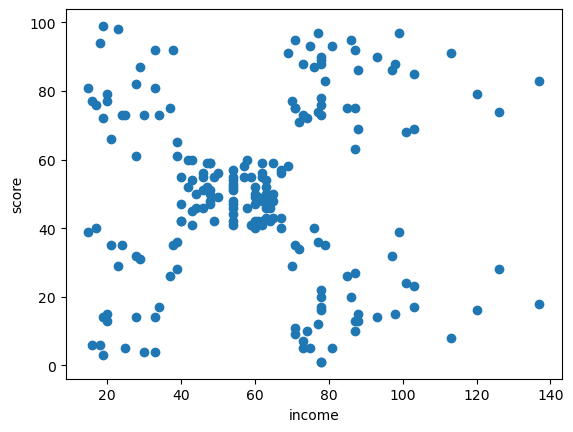

In [4]:
plt.scatter(df["income"],df["score"])
plt.xlabel("income")
plt.ylabel("score")
plt.show()

In [5]:
scaler=MinMaxScaler()
scaler.fit(df[["income"]])
df["income"]=scaler.transform(df[["income"]])
scaler.fit(df[["score"]])
df["score"]=scaler.transform(df[["score"]])
df.head()

,CustomerID,income,score
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


In [7]:
#to find k value, use elbow-method
k_range=range(1,11)
list_dist=[]

for k in k_range:
    kmeans_model=KMeans(n_clusters=k)
    kmeans_model.fit(df[["income","score"]])
    list_dist.append(kmeans_model.inertia_)


c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

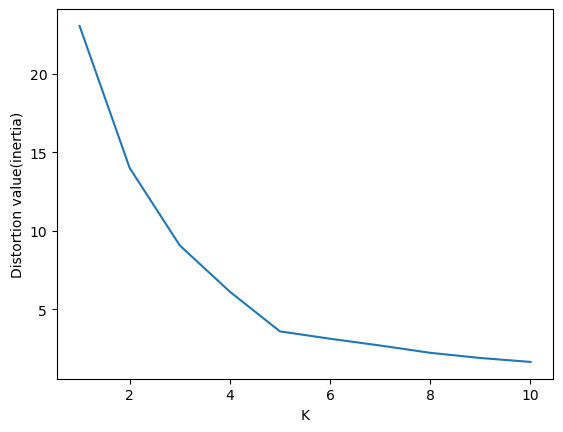

In [8]:
plt.xlabel("K")
plt.ylabel("Distortion value(inertia)")
plt.plot(k_range,list_dist)
plt.show()

In [9]:
#K=5
kmeans_model2=KMeans(n_clusters=5)
y_pred=kmeans_model2.fit_predict(df[["income","score"]])


c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
df["cluster"]=y_pred
df.head()

,CustomerID,income,score,cluster
0,1,0.000000,0.387755,0
1,2,0.000000,0.816327,4
2,3,0.008197,0.051020,0
3,4,0.008197,0.775510,4
4,5,0.016393,0.397959,0


In [11]:
#centroid
kmeans_model2.cluster_centers_

array([[0.09265859, 0.20319432],
       [0.33029751, 0.49508692],
       [0.6       , 0.16443149],
       [0.58638083, 0.82783883],
       [0.08792846, 0.79962894]])

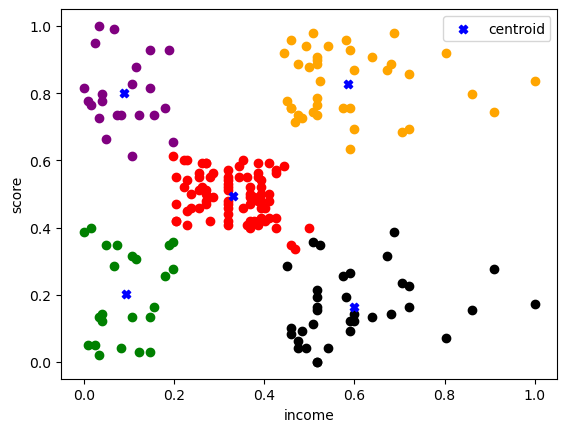

In [12]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]

plt.xlabel("income")
plt.ylabel("score")
plt.scatter(df1["income"],df1["score"],color="green")
plt.scatter(df2["income"],df2["score"],color="red")
plt.scatter(df3["income"],df3["score"],color="black")
plt.scatter(df4["income"],df4["score"],color="orange")
plt.scatter(df5["income"],df5["score"],color="purple")


plt.scatter(kmeans_model2.cluster_centers_[:,0],kmeans_model2.cluster_centers_[:,1],color="blue",marker="X",label="centroid")
plt.legend()
plt.show()